In [13]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

df = pd.read_csv("CrimesOnWomenData.csv")

df.head()

,Unnamed: 0,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,2,ASSAM,2001,817,1070,59,850,4,1248,0
3,3,BIHAR,2001,888,518,859,562,21,1558,83
4,4,CHHATTISGARH,2001,959,171,70,1763,161,840,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  736 non-null    int64 
 1   State       736 non-null    object
 2   Year        736 non-null    int64 
 3   Rape        736 non-null    int64 
 4   K&A         736 non-null    int64 
 5   DD          736 non-null    int64 
 6   AoW         736 non-null    int64 
 7   AoM         736 non-null    int64 
 8   DV          736 non-null    int64 
 9   WT          736 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 57.6+ KB


In [15]:
df.describe()

,Unnamed: 0,Year,Rape,K&A,DD,AoW,AoM,DV,WT
count,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000
mean,367.500000,2011.149457,727.855978,1134.542120,215.692935,1579.115489,332.722826,2595.078804,28.744565
std,212.609188,6.053453,977.024945,1993.536828,424.927334,2463.962518,806.024551,4042.004953,79.999660
min,0.000000,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,183.750000,2006.000000,35.000000,24.750000,1.000000,34.000000,3.000000,13.000000,0.000000
50%,367.500000,2011.000000,348.500000,290.000000,29.000000,387.500000,31.000000,678.500000,0.000000
75%,551.250000,2016.000000,1069.000000,1216.000000,259.000000,2122.250000,277.500000,3545.000000,15.000000
max,735.000000,2021.000000,6337.000000,15381.000000,2524.000000,14853.000000,9422.000000,23278.000000,549.000000


In [121]:
# Convert all state names to uppercase
df['State'] = df['State'].str.upper()

# Group by the standardized state names and sum the crime data
df_standardized = df.groupby('State')[['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']].sum().reset_index()

# Display the head of the new DataFrame to show the combined data
display(df_standardized.head())

,State,Rape,K&A,DD,AoW,AoM,DV,WT
0,A & N ISLANDS,424,363,13,558,135,365,10
1,ANDHRA PRADESH,23424,21707,8165,92084,54684,188511,2548
2,ARUNACHAL PRADESH,1153,1272,4,1584,97,705,7
3,ASSAM,32190,71462,2757,47115,2698,135415,343
4,BIHAR,21006,77687,24428,9953,800,55187,825


In [38]:
df.groupby(["Year"])["Rape"].mean()

,Rape
Year,
2001,461.588235
2002,469.705882
2003,451.676471
2004,520.058824
2005,520.617647
2006,550.735294
2007,592.323529
2008,617.676471
2009,615.529412


In [35]:
df.groupby(["State"])[["Rape"]].count()

,Rape
State,
A & N ISLANDS,10
A & N Islands,11
ANDHRA PRADESH,10
ARUNACHAL PRADESH,10
ASSAM,10
...,...
UTTARAKHAND,10
Uttar Pradesh,11
Uttarakhand,11


Text(0, 0.5, 'Número de secuestros')

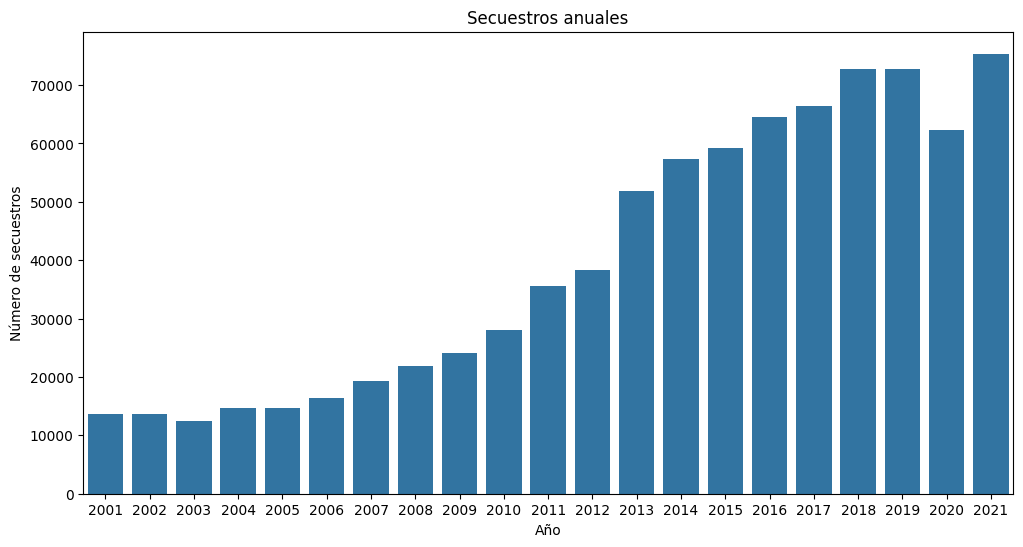

In [50]:
secuestros_anuales = df.groupby("Year")['K&A'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x="Year", y="K&A", data=secuestros_anuales)
plt.title("Secuestros anuales")
plt.xlabel("Año")
plt.ylabel("Número de secuestros")

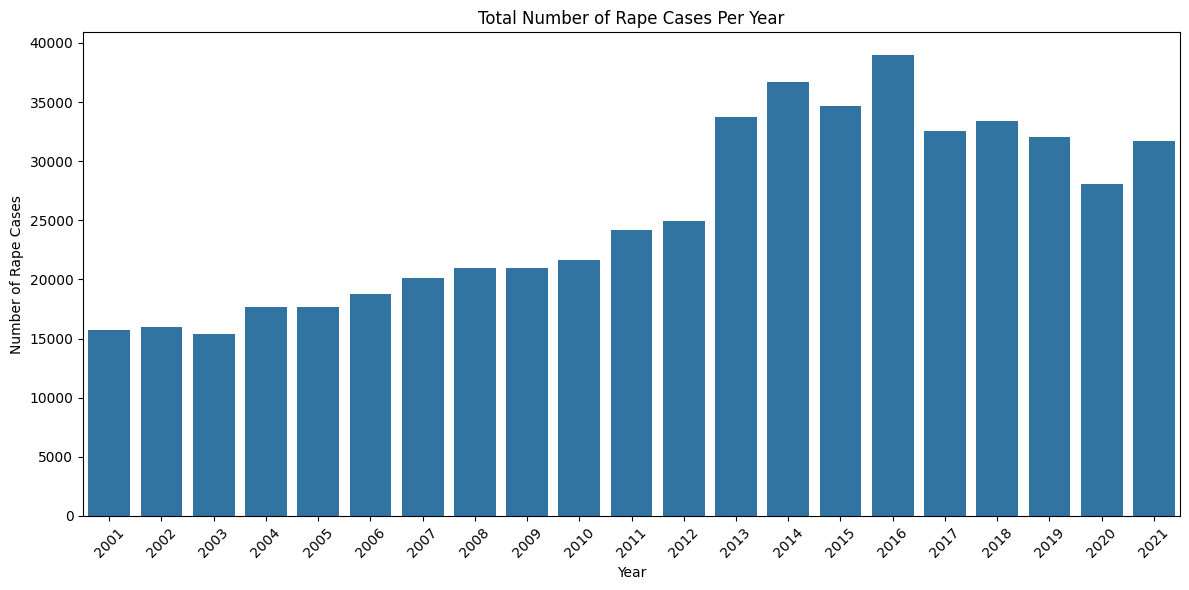

In [46]:
yearly_rape_cases = df.groupby('Year')['Rape'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Rape', data=yearly_rape_cases)
plt.title('Total Number of Rape Cases Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Rape Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Número de secuestros')

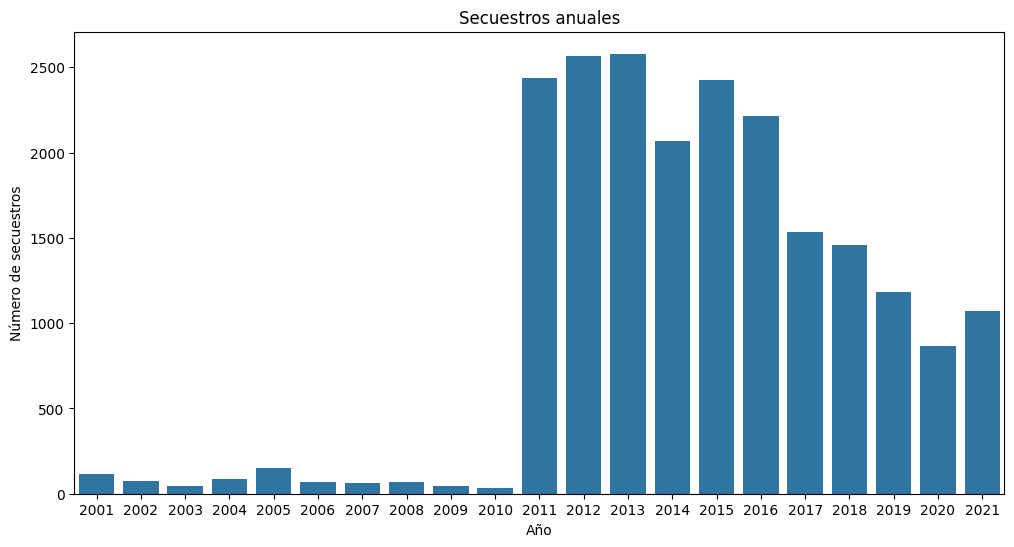

In [51]:
trafico = df.groupby("Year")['WT'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x="Year", y="WT", data=trafico)
plt.title("Secuestros anuales")
plt.xlabel("Año")
plt.ylabel("Número de secuestros")

In [99]:
from plotly.subplots import make_subplots

violencia_domestica = df.groupby("Year")['DV'].sum().reset_index()
asalto = df.groupby("Year")['AoW'].sum().reset_index()

aow_2010 = asalto[asalto['Year'] == 2010]['AoW'].iloc[0]
aow_2012 = asalto[asalto['Year'] == 2012]['AoW'].iloc[0]
promedio_aow = (aow_2010 + aow_2012) / 2
asalto.loc[asalto['Year'] == 2011, 'AoW'] = promedio_aow


muertes = df.groupby("Year")['DD'].sum().reset_index()

fig = make_subplots(rows=6, cols=1, subplot_titles=("Casos de violación por año", "Secuestros anuales", "Trafico anual", "Casos de Violencia Domestica por año","Asalto contra mujeres por año", "Muertes provocadas por año"))

fig.add_trace(go.Bar(x=yearly_rape_cases["Year"], y=yearly_rape_cases["Rape"], marker_color='darkgray'), row=1, col=1)
fig.add_trace(go.Bar(x=secuestros_anuales["Year"], y=secuestros_anuales["K&A"], marker_color='darkred'), row=2, col=1)
fig.add_trace(go.Bar(x=trafico["Year"], y=trafico["WT"], marker_color='darksalmon'), row=3, col=1)
fig.add_trace(go.Bar(x=violencia_domestica["Year"], y=violencia_domestica["DV"], marker_color='darkseagreen'), row=4, col=1)
fig.add_trace(go.Bar(x=asalto["Year"], y=asalto["AoW"], marker_color='darkgreen'), row=5, col=1)
fig.add_trace(go.Bar(x=muertes["Year"], y=muertes["DD"], marker_color='darkblue'), row=6, col=1)

fig.update_legends()
fig.update_layout(height=800, title_text="Crimenes contra las Mujeres en India")
fig.show()

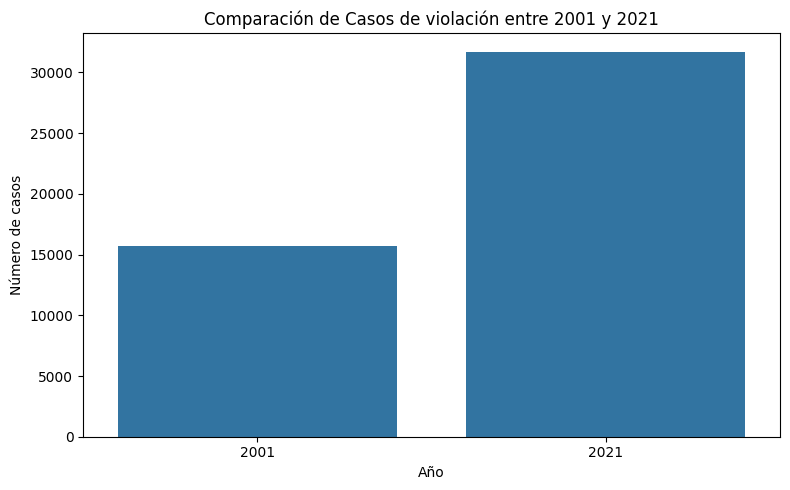

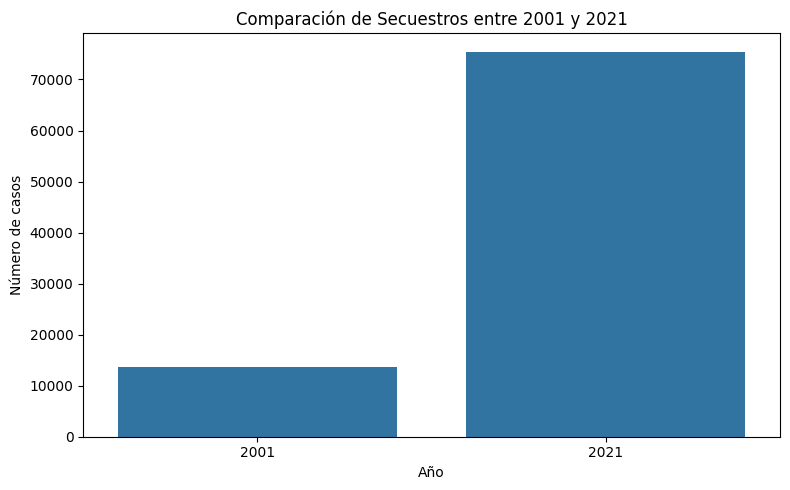

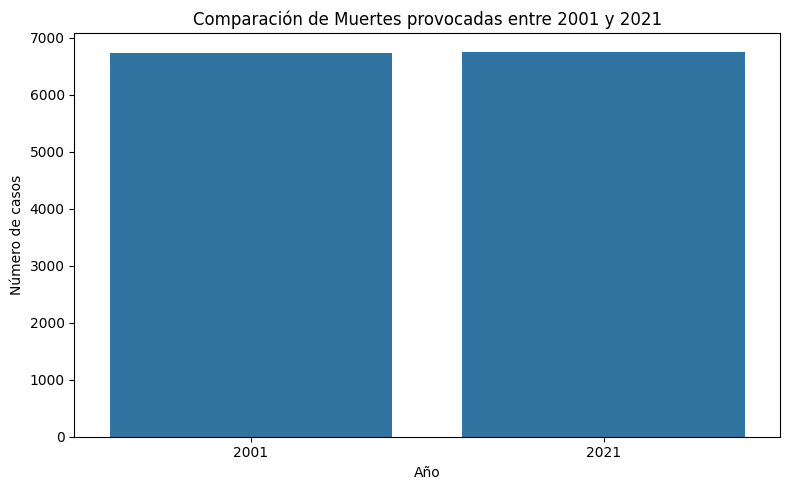

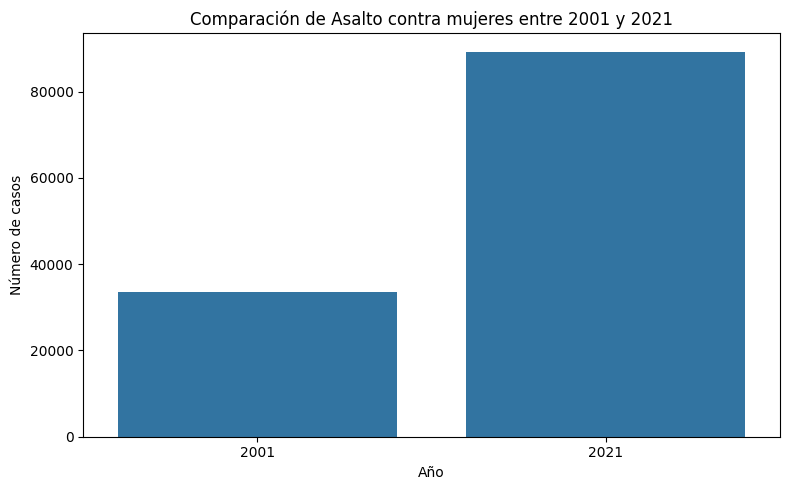

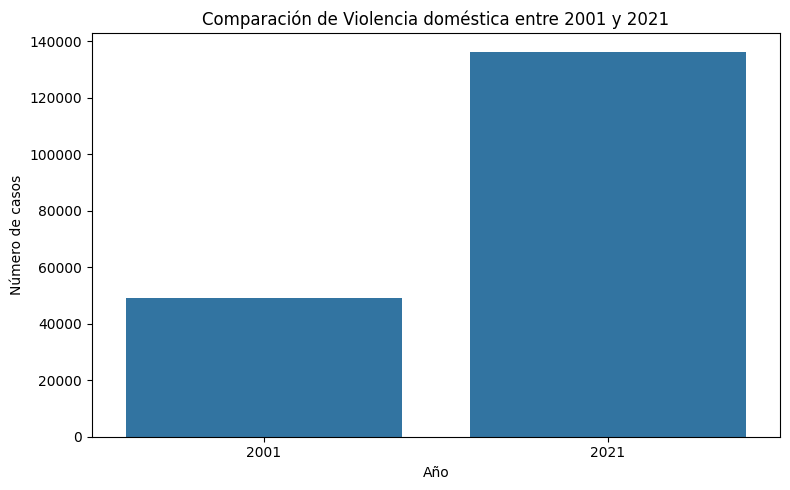

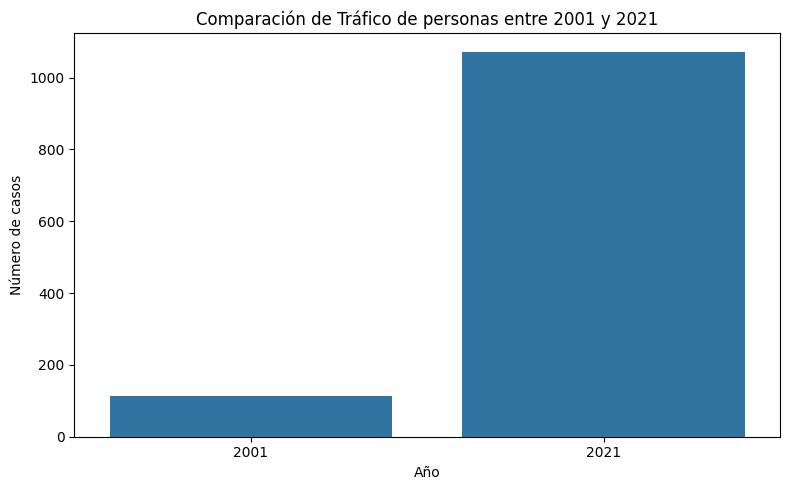

In [131]:
crime_types = ['Rape', 'K&A', 'DD', 'AoW', 'DV', 'WT']
crime_titles = {
    'Rape': 'Casos de violación',
    'K&A': 'Secuestros',
    'DD': 'Muertes provocadas',
    'AoW': 'Asalto contra mujeres',
    'DV': 'Violencia doméstica',
    'WT': 'Tráfico de personas'
}

oldest_year = df['Year'].min()
most_recent_year = df['Year'].max()

for crime in crime_types:
    crime_data = df.groupby('Year')[crime].sum().reset_index()
    compare_years_data = crime_data[crime_data['Year'].isin([oldest_year, most_recent_year])]

    plt.figure(figsize=(8, 5))
    sns.barplot(x='Year', y=crime, data=compare_years_data)
    plt.title(f'Comparación de {crime_titles[crime]} entre {oldest_year} y {most_recent_year}')
    plt.xlabel('Año')
    plt.ylabel('Número de casos')
    plt.xticks([0, 1], [oldest_year, most_recent_year])
    plt.tight_layout()
    plt.show()

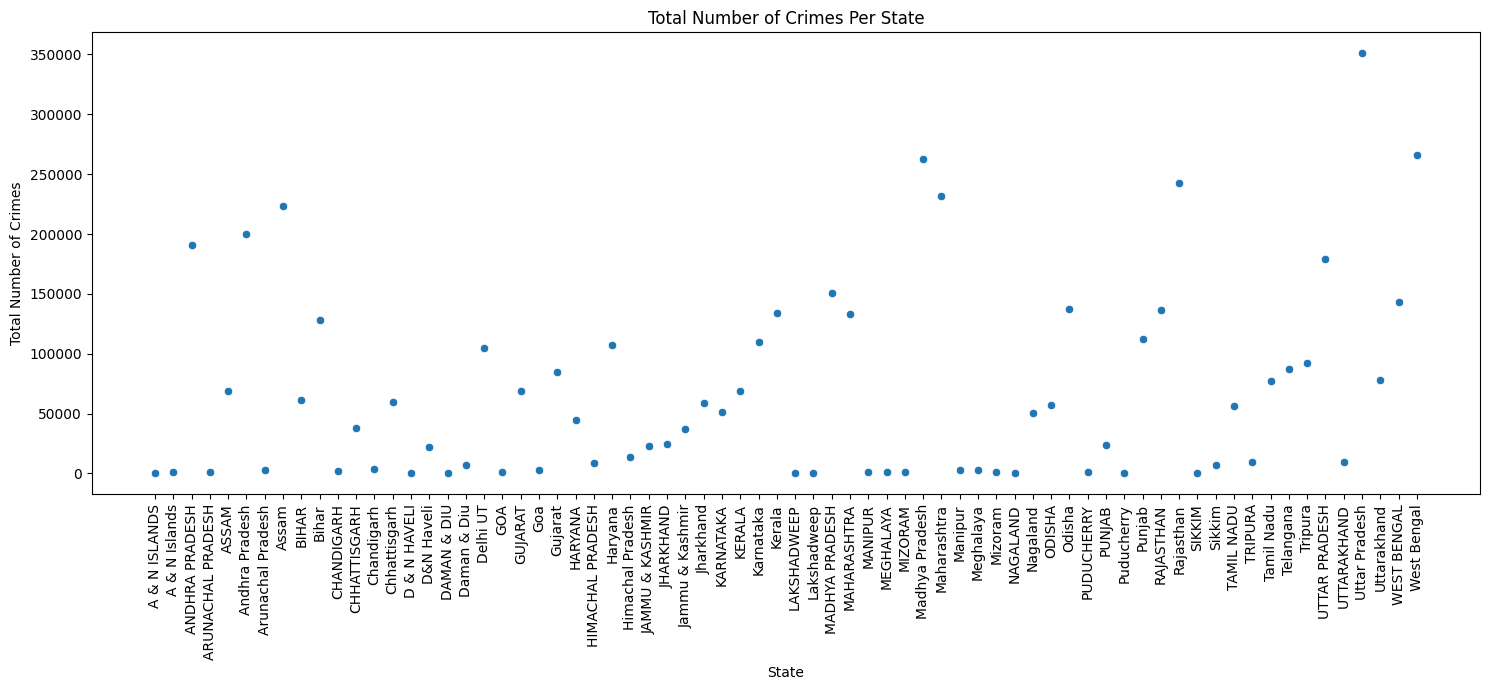

In [117]:
# Calculate the total number of crimes per state
crimes_by_state = df.groupby('State')[['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']].sum().reset_index()

# Calculate the total crimes across all types for each state
crimes_by_state['Total_Crimes'] = crimes_by_state[['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']].sum(axis=1)

# Create the scatter plot
plt.figure(figsize=(15, 7))
sns.scatterplot(x='State', y='Total_Crimes', data=crimes_by_state)
plt.title('Total Number of Crimes Per State')
plt.xlabel('State')
plt.ylabel('Total Number of Crimes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

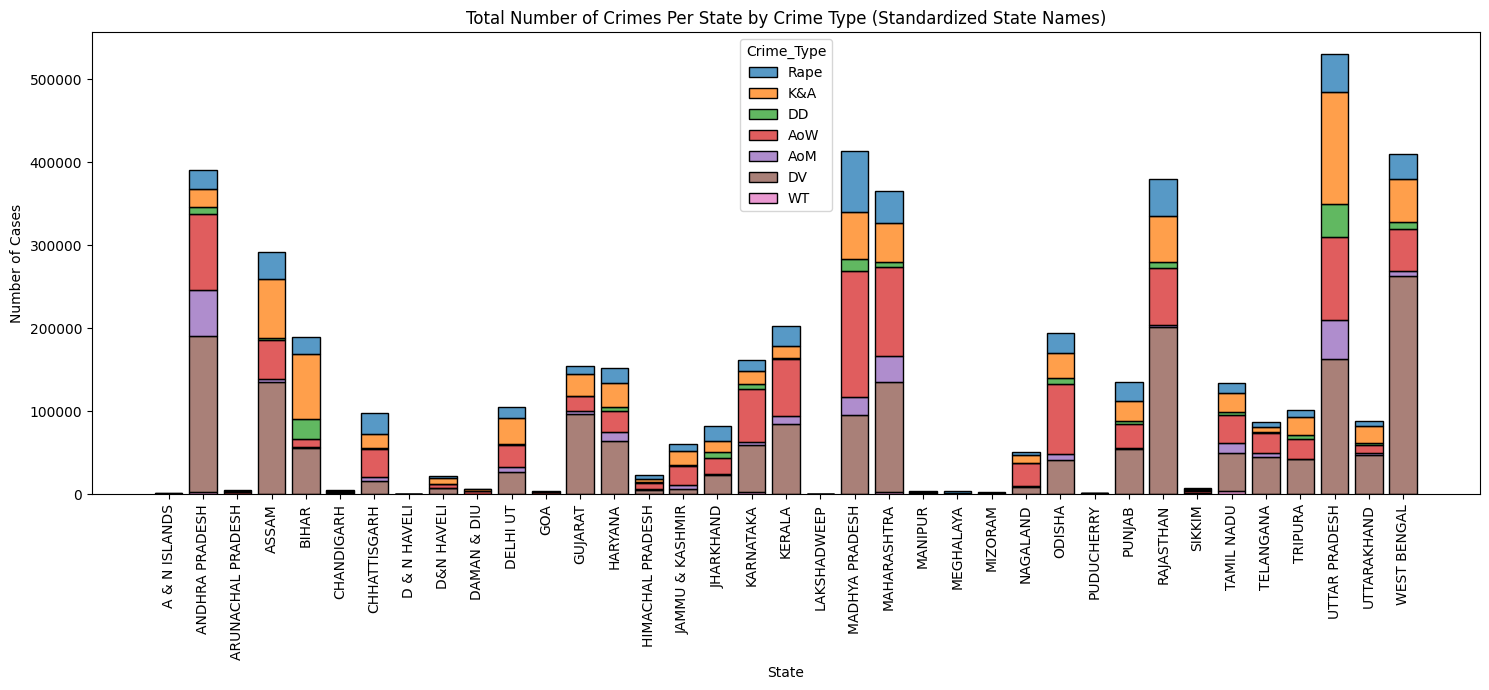

In [123]:
# Melt the DataFrame to long format for easier plotting of stacked bars
crimes_melted = df_standardized.melt(
    id_vars='State',
    value_vars=['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT'],
    var_name='Crime_Type',
    value_name='Number_of_Cases'
)

plt.figure(figsize=(15, 7))
sns.histplot(data=crimes_melted, x='State', weights='Number_of_Cases', hue='Crime_Type', multiple='stack', shrink=0.8)
plt.title('Total Number of Crimes Per State by Crime Type (Standardized State Names)')
plt.xlabel('State')
plt.ylabel('Number of Cases')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

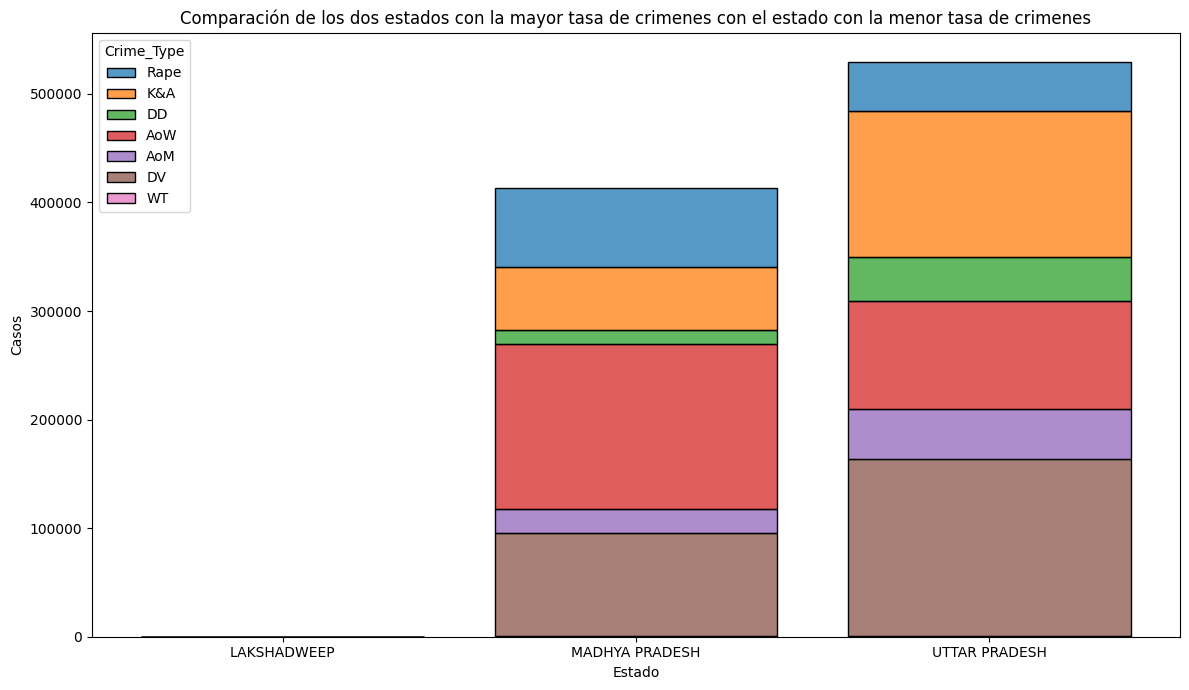

In [128]:
# Calculate total crimes per state (if not already calculated)
if 'Total_Crimes' not in df_standardized.columns:
    df_standardized['Total_Crimes'] = df_standardized[['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']].sum(axis=1)

# Get the top 2 states with the highest total crimes
top_2_states = df_standardized.nlargest(2, 'Total_Crimes')

# Get the state with the lowest total crimes
lowest_state = df_standardized.nsmallest(1, 'Total_Crimes')

# Combine the top 2 states and the lowest state
states_to_compare = pd.concat([top_2_states, lowest_state])

# Filter the standardized DataFrame to include only these states
df_compare_states = df_standardized[df_standardized['State'].isin(states_to_compare['State'])]

# Melt the filtered DataFrame
crimes_melted_compare = df_compare_states.melt(
    id_vars='State',
    value_vars=['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT'],
    var_name='Crime_Type',
    value_name='Number_of_Cases'
)

plt.figure(figsize=(12, 7))
sns.histplot(data=crimes_melted_compare, x='State', weights='Number_of_Cases', hue='Crime_Type', multiple='stack', shrink=0.8)
plt.title('Comparación de los dos estados con la mayor tasa de crimenes con el estado con la menor tasa de crimenes')
plt.xlabel('Estado')
plt.ylabel('Casos')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

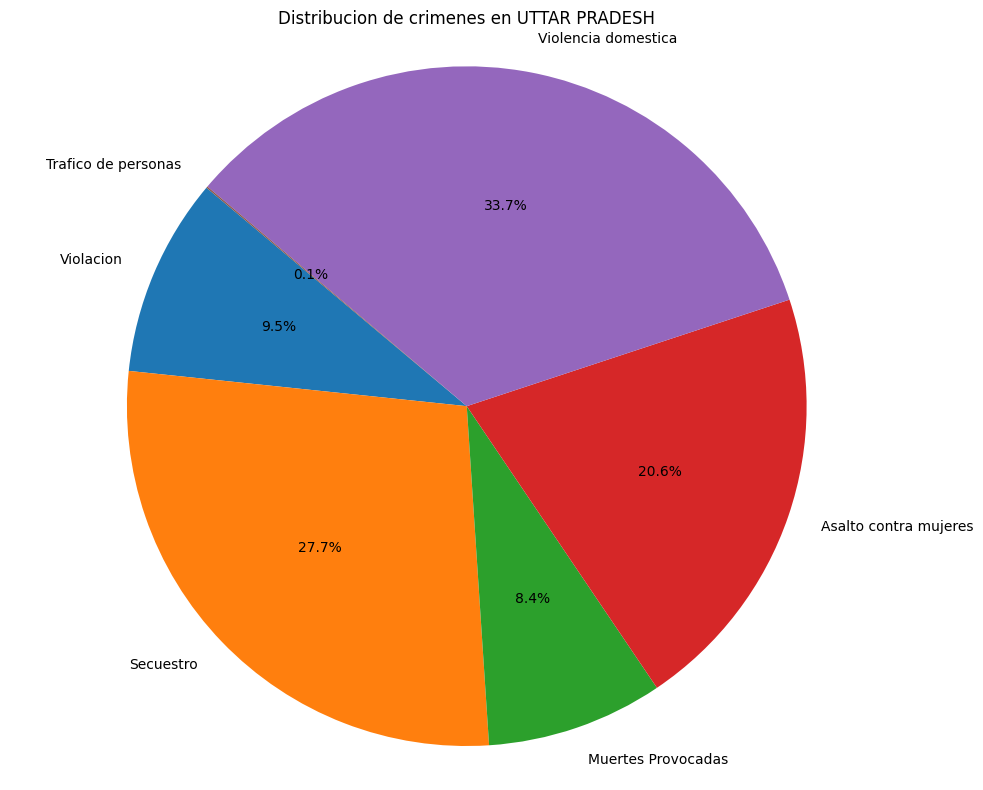

In [139]:
# Filter the data for Uttar Pradesh
uttar_pradesh_crimes = df_standardized[df_standardized['State'] == 'UTTAR PRADESH']

# Select only the crime columns
uttar_pradesh_crimes_data = uttar_pradesh_crimes[['Rape', 'K&A', 'DD', 'AoW',  'DV', 'WT']]

# Transpose the data and reset index to prepare for pie chart
uttar_pradesh_crimes_transposed = uttar_pradesh_crimes_data.T.reset_index()
uttar_pradesh_crimes_transposed.columns = ['Crime_Type', 'Number_of_Cases']

# Update the casos list to include all crime types with Spanish names
casos = ['Violacion', 'Secuestro', 'Muertes Provocadas', 'Asalto contra mujeres', 'Violencia domestica', 'Trafico de personas']

# Create the pie chart
plt.figure(figsize=(10, 8))
plt.pie(uttar_pradesh_crimes_transposed['Number_of_Cases'], labels=casos, autopct='%1.1f%%', startangle=140)
plt.title('Distribucion de crimenes en UTTAR PRADESH')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()